In [1]:
pwd

'C:\\Users\\Suraj\\Desktop\\mini_project\\Travee.AI'

In [2]:
import os
os.chdir("C:\\Users\\Suraj\\Desktop\\mini_project\\Travee.AI\\dataset_ds")

In [3]:
os.listdir("C:\\Users\\Suraj\\Desktop\\mini_project\\Travee.AI\\dataset_ds")

['dataset.json',
 'guideline_data_scientist.docx',
 '~$ideline_data_scientist.docx']

Importing the Python libraries we will be using for this project

In [4]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import plotly.graph_objects as go
import re
import missingno as msno

# Import NLP library for Text-Data Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
dummy_data = pd.read_json("dataset.json")

In [6]:
dummy_data.head(n=5)

,pid,en_type,name,category,agg_rating,email,facilities,inventory,prices,lat,long,numberOfFeedbacks,feedback,Ftags,priceRange
0,60330,HOTEL,Royal Palace Hotel,hotel,5.0,royalpalacehotel@gmail.com,[],NaN,[],-36.64943,-18.59665,7,"[{'pid': 950009, 'lang': 'en', 'loc_id': 60330...",[],NaN
1,59888,HOTEL,Ocean View Hotel,hotel,5.0,oceanviewhotel@gmail.com,[],NaN,[],-18.59665,-15.74197,1,"[{'pid': 343722, 'lang': 'en', 'loc_id': 59888...",[],"₹1,475"
2,91560,HOTEL,Grand Plaza Hotel,hotel,5.0,grandplazahotel@gmail.com,[],11.0,[],-15.74197,33.30524,15,"[{'pid': 333842, 'lang': 'en', 'loc_id': 91560...",[],"₹6,637 - ₹7,047"
3,30409,HOTEL,Sunset View Hotel,hotel,5.0,sunsetviewhotel@gmail.com,[],6.0,[],33.30524,-67.65205,1,"[{'pid': 93565, 'lang': 'en', 'loc_id': 30409,...",[],NaN
4,27489,HOTEL,Golden Sands Hotel,hotel,3.5,goldensandshotel@gmail.com,[],12.0,[],-67.65205,-92.26539,42,"[{'pid': 976906, 'lang': 'en', 'loc_id': 27489...","[{'text': 'tree house', 'review_count': 3}, {'...","₹901 - ₹1,475"


In [7]:
dummy_data[["name","numberOfFeedbacks","priceRange"]]

,name,numberOfFeedbacks,priceRange
0,Royal Palace Hotel,7,NaN
1,Ocean View Hotel,1,"₹1,475"
2,Grand Plaza Hotel,15,"₹6,637 - ₹7,047"
3,Sunset View Hotel,1,NaN
4,Golden Sands Hotel,42,"₹901 - ₹1,475"
5,Royal Garden Hotel,3,NaN
6,Sapphire Hotel,120,"₹819 - ₹1,557"
7,Paradise Hotel,1,NaN
8,Emerald Hotel,31,"₹3,196 - ₹4,507"
9,Diamond Hotel,0,"₹1,885 - ₹2,130"


In [8]:
#For Feedback received by the hotel

FeedbackRecived_Hotel = dummy_data[dummy_data["numberOfFeedbacks"] > 0]
print("Feedback received by the hotelis greater than 0:", len(FeedbackRecived_Hotel))

print(FeedbackRecived_Hotel["name"])

Feedback received by the hotelis greater than 0: 10
0     Royal Palace Hotel
1       Ocean View Hotel
2      Grand Plaza Hotel
3      Sunset View Hotel
4     Golden Sands Hotel
5     Royal Garden Hotel
6         Sapphire Hotel
7         Paradise Hotel
8          Emerald Hotel
10     Blue Lagoon Hotel
Name: name, dtype: object


In [9]:
print("Number Of feedback Recivied:", dummy_data["numberOfFeedbacks"].sum())


Number Of feedback Recivied: 224


In [10]:
dummy_data.columns

Index(['pid', 'en_type', 'name', 'category', 'agg_rating', 'email',
       'facilities', 'inventory', 'prices', 'lat', 'long', 'numberOfFeedbacks',
       'feedback', 'Ftags', 'priceRange'],
      dtype='object')

# 01.Read the jason Data & json-normalize on Nested JSON with Arrays

In [11]:
# Open the JSON file for reading
with open('dataset.json', 'r') as file:
    # Load JSON data from the file
    data = json.load(file)

In [12]:
data

[{'pid': 60330,
  'en_type': 'HOTEL',
  'name': 'Royal Palace Hotel',
  'category': 'hotel',
  'agg_rating': 5,
  'email': 'royalpalacehotel@gmail.com',
  'facilities': [],
  'inventory': None,
  'prices': [],
  'lat': '-36.64943',
  'long': '-18.59665',
  'numberOfFeedbacks': 7,
  'feedback': [{'pid': 950009,
    'lang': 'en',
    'loc_id': 60330,
    'rating': '5',
    'en_type': 'review',
    'free_text': "The room was clean and comfortable. I had a great night's sleep. The staff was friendly and helpful. They made sure I had everything I needed during my stay. The staff was friendly and helpful. They made sure I had everything I needed during my stay. The staff was friendly and helpful. They made sure I had everything I needed during my stay. The staff was friendly and helpful. They made sure I had everything I needed during my stay.",
    'user': None,
    'feedback_title': 'Good stay good value',
    'subrating': []},
   {'pid': 175995,
    'lang': 'en',
    'loc_id': 60330,
    

In [13]:
# Example of feedback of customer towards Ocean View Hotel In Jason data

data[1]

{'priceRange': '₹1,475',
 'pid': 59888,
 'en_type': 'HOTEL',
 'name': 'Ocean View Hotel',
 'category': 'hotel',
 'agg_rating': 5,
 'email': 'oceanviewhotel@gmail.com',
 'facilities': [],
 'inventory': None,
 'prices': [],
 'lat': '-18.59665',
 'long': '-15.74197',
 'numberOfFeedbacks': 1,
 'feedback': [{'pid': 343722,
   'lang': 'en',
   'loc_id': 59888,
   'rating': '5',
   'en_type': 'review',
   'free_text': 'The hotel had a beautiful rooftop pool with stunning views of the city. The breakfast buffet was delicious and had a good variety of options. The hotel had a great rooftop bar with stunning views of the city. The breakfast buffet was delicious and had a good variety of options. The hotel had a great gym and pool. I was able to stay active during my stay.',
   'user': None,
   'feedback_title': 'Excellent homestay ',
   'subrating': []}],
 'Ftags': []}

The given data contains user feedback toward the hotel, so we need to extract specific pieces of information across nested JSON data structures. This is why I chose the "feedback" record path.

In [14]:
main_dataframe = pd.json_normalize(data,record_path="feedback",meta=["name",'agg_rating','numberOfFeedbacks','priceRange',
                                                   ["subrating","name"],
                                                   "subrating","value"],
                                              meta_prefix = 'meta_',
                                              errors='ignore')

In [15]:
main_dataframe.shape

(224, 17)

In [16]:
main_dataframe.columns

Index(['pid', 'lang', 'loc_id', 'rating', 'en_type', 'free_text', 'user',
       'feedback_title', 'subrating', 'partner_attribution', 'meta_name',
       'meta_agg_rating', 'meta_numberOfFeedbacks', 'meta_priceRange',
       'meta_subrating.name', 'meta_subrating', 'meta_value'],
      dtype='object')

In [17]:
main_dataframe.sample(10)

,pid,lang,loc_id,rating,en_type,free_text,user,feedback_title,subrating,partner_attribution,meta_name,meta_agg_rating,meta_numberOfFeedbacks,meta_priceRange,meta_subrating.name,meta_subrating,meta_value
149,611818,en,43477,5,review,The Grand Plaza Hotel was a great place to sta...,None,Wind Valley Review,[],NaN,Sapphire Hotel,5,120,"₹819 - ₹1,557",NaN,NaN,NaN
81,630271,en,43477,5,review,The staff was friendly and helpful. They made ...,None,"Quaint place, God level food",[],NaN,Sapphire Hotel,5,120,"₹819 - ₹1,557",NaN,NaN,NaN
51,154020,en,27489,4,review,The staff was friendly and helpful. They made ...,None,Great weekend getaway hotel,"[{'name': 'Rooms', 'value': '5'}, {'name': 'Va...",Review collected in partnership with Cleartrip,Golden Sands Hotel,3.5,42,"₹901 - ₹1,475",NaN,NaN,NaN
133,410933,en,43477,5,review,The hotel had a great restaurant with deliciou...,None,Trip to Ramakkalmedu,[],NaN,Sapphire Hotel,5,120,"₹819 - ₹1,557",NaN,NaN,NaN
157,199466,en,43477,3,review,The staff was friendly and helpful. They went ...,None,"An excellent host and a basic, decent place to...",[],NaN,Sapphire Hotel,5,120,"₹819 - ₹1,557",NaN,NaN,NaN
164,867199,en,43477,5,review,The hotel had a great rooftop bar with stunnin...,None,"Friendly Home stay, Excellent Food, Proper Gui...","[{'name': 'Rooms', 'value': '5'}, {'name': 'Cl...",NaN,Sapphire Hotel,5,120,"₹819 - ₹1,557",NaN,NaN,NaN
19,636193,en,91560,5,review,The breakfast buffet was delicious and had a g...,None,Wonderful eco friendly resort.,"[{'name': 'Sleep Quality', 'value': '5'}, {'na...",NaN,Grand Plaza Hotel,5,15,"₹6,637 - ₹7,047",NaN,NaN,NaN
216,249714,en,9847,5,review,The staff at the Ocean View Hotel were very ac...,None,Exclent hospilaity,"[{'name': 'Value', 'value': '5'}, {'name': 'Cl...",NaN,Emerald Hotel,4,31,"₹3,196 - ₹4,507",NaN,NaN,NaN
98,619935,en,43477,5,review,The location of the hotel was perfect for expl...,None,Excelent,[],NaN,Sapphire Hotel,5,120,"₹819 - ₹1,557",NaN,NaN,NaN
218,213526,en,9847,5,review,The location of the hotel was perfect for a be...,None,"Peace, Happiness and Delicious","[{'name': 'Rooms', 'value': '5'}, {'name': 'Va...",NaN,Emerald Hotel,4,31,"₹3,196 - ₹4,507",NaN,NaN,NaN


In [18]:
 # After Normalization we cheack our record properly normalize or Not
Exofcustomer = main_dataframe[main_dataframe['meta_name'] == "Ocean View Hotel"]


In [19]:
Exofcustomer

,pid,lang,loc_id,rating,en_type,free_text,user,feedback_title,subrating,partner_attribution,meta_name,meta_agg_rating,meta_numberOfFeedbacks,meta_priceRange,meta_subrating.name,meta_subrating,meta_value
7,343722,en,59888,5,review,The hotel had a beautiful rooftop pool with st...,None,Excellent homestay,[],NaN,Ocean View Hotel,5,1,"₹1,475",NaN,NaN,NaN


# 02.EDA(Exploratory Data Analysis)

-Understanding about Data

-Summarize the dataset

-Visuliaze

-cheack input var relation towards target var

In [20]:
print("The shape of the data (rows, cols) is " + str(main_dataframe.shape))

The shape of the data (rows, cols) is (224, 17)


In [21]:
main_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   pid                     224 non-null    int64 
 1   lang                    224 non-null    object
 2   loc_id                  224 non-null    int64 
 3   rating                  224 non-null    object
 4   en_type                 224 non-null    object
 5   free_text               224 non-null    object
 6   user                    0 non-null      object
 7   feedback_title          224 non-null    object
 8   subrating               224 non-null    object
 9   partner_attribution     1 non-null      object
 10  meta_name               224 non-null    object
 11  meta_agg_rating         224 non-null    object
 12  meta_numberOfFeedbacks  224 non-null    object
 13  meta_priceRange         209 non-null    object
 14  meta_subrating.name     0 non-null      object
 15  meta_s

In [22]:
numnerical_var = ["rating",
                  "user",
                  "subrating",
                  "meta_agg_rating",
                  "meta_numberOfFeedbacks",
                  "meta_priceRange",
                  ] 

# Convert incorrect data types back to their original types 
for col in numnerical_var:
    main_dataframe[col] = pd.to_numeric(main_dataframe[col], errors='coerce')


In [23]:
main_dataframe.dtypes

pid                         int64
lang                       object
loc_id                      int64
rating                      int64
en_type                    object
free_text                  object
user                      float64
feedback_title             object
subrating                 float64
partner_attribution        object
meta_name                  object
meta_agg_rating           float64
meta_numberOfFeedbacks      int64
meta_priceRange           float64
meta_subrating.name        object
meta_subrating             object
meta_value                 object
dtype: object

In [24]:
# get info for Numric variable
main_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
pid,224.0,510888.040179,282362.608612,13698.0,252898.5,532150.5,748998.0,987519.0
loc_id,224.0,40003.058036,19174.597368,9847.0,27489.0,43477.0,43477.0,91560.0
rating,224.0,4.500000,1.116529,1.0,5.0,5.0,5.0,5.0
user,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subrating,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meta_agg_rating,224.0,4.566964,0.622794,3.5,4.0,5.0,5.0,5.0
meta_numberOfFeedbacks,224.0,77.767857,46.439986,1.0,31.0,120.0,120.0,120.0
meta_priceRange,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Get descriptive stat. for Categoric Variable
main_dataframe.describe(include=object)

,lang,en_type,free_text,feedback_title,partner_attribution,meta_name,meta_subrating.name,meta_subrating,meta_value
count,224,224,224,224,1,224,0,0,0
unique,3,1,224,215,1,10,0,0,0
top,en,review,The room was clean and comfortable. I had a gr...,Excellent,Review collected in partnership with Cleartrip,Sapphire Hotel,NaN,NaN,NaN
freq,222,224,1,5,1,120,NaN,NaN,NaN


Analyzing numeric variables with univariate analysis

In [26]:
main_dataframe["rating"].value_counts()

5    173
4     25
1     15
3      6
2      5
Name: rating, dtype: int64

Text(0.5, 1.0, 'Distribution Of Rating')

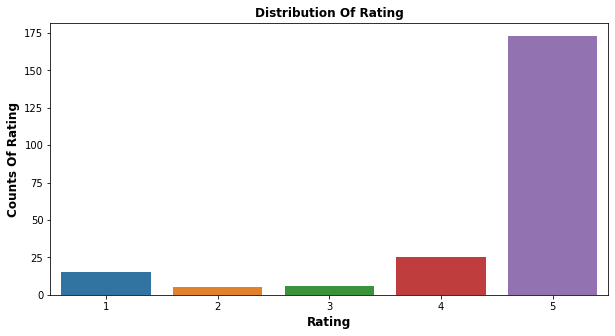

In [27]:
rating_counts = main_dataframe["rating"].value_counts()

plt.figure(figsize = (10,5))
sns.barplot(x=rating_counts.index , y=rating_counts.values)
plt.ylabel("Counts Of Rating",fontweight='bold',fontsize=12)
plt.xlabel("Rating",fontweight='bold',fontsize=12)
plt.title("Distribution Of Rating",fontweight='bold',fontsize=12)

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

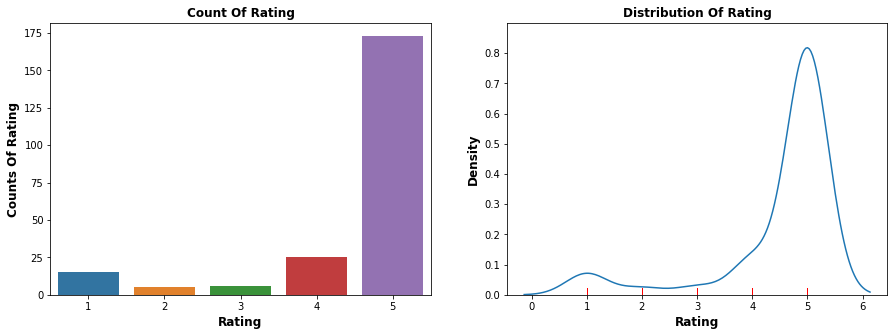

In [28]:

#create figurewith 1*2 subplot
fig,axes = plt.subplots(1,2,figsize=(15,5)) 

rating_counts = main_dataframe["rating"].value_counts()

sns.barplot(x=rating_counts.index , y=rating_counts.values,ax=axes[0])
axes[0].set_title("Count Of Rating",fontweight='bold',fontsize=12)
axes[0].set_xlabel("Rating",fontweight='bold',fontsize=12)  
axes[0].set_ylabel("Counts Of Rating",fontweight='bold',fontsize=12)  


sns.distplot(main_dataframe["rating"],rug=True,hist=False,rug_kws={"color": "red"},ax=axes[1])
axes[1].set_title("Distribution Of Rating",fontweight='bold',fontsize=12)
axes[1].set_xlabel("Rating",fontweight='bold',fontsize=12) 
axes[1].set_ylabel("Density",fontweight='bold',fontsize=12) 

In [29]:
main_dataframe["meta_agg_rating"].value_counts()

5.0    148
3.5     42
4.0     34
Name: meta_agg_rating, dtype: int64

Text(0.5, 1.0, 'Distribution Of Aggregate Rating')

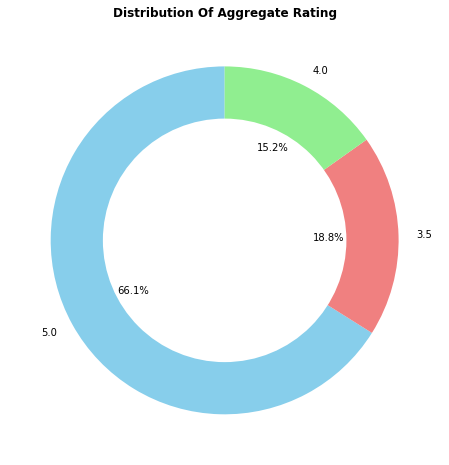

In [30]:
plt.figure(figsize=(8, 8))

plt.pie(main_dataframe["meta_agg_rating"].value_counts().values,
        labels=main_dataframe["meta_agg_rating"].value_counts().index,
        autopct='%1.1f%%',colors=['skyblue', 'lightcoral', 'lightgreen'],
        startangle=90, 
        wedgeprops=dict(width=0.4))

# Draw a circle at the center to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution Of Aggregate Rating",fontweight='bold',fontsize=12)


In [31]:
#Count Of Feedback received by the hotel
main_dataframe["meta_name"].value_counts()

Sapphire Hotel        120
Golden Sands Hotel     42
Emerald Hotel          31
Grand Plaza Hotel      15
Royal Palace Hotel      7
Royal Garden Hotel      3
Blue Lagoon Hotel       3
Ocean View Hotel        1
Sunset View Hotel       1
Paradise Hotel          1
Name: meta_name, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sapphire Hotel'),
  Text(1, 0, 'Golden Sands Hotel'),
  Text(2, 0, 'Emerald Hotel'),
  Text(3, 0, 'Grand Plaza Hotel'),
  Text(4, 0, 'Royal Palace Hotel'),
  Text(5, 0, 'Royal Garden Hotel'),
  Text(6, 0, 'Blue Lagoon Hotel'),
  Text(7, 0, 'Ocean View Hotel'),
  Text(8, 0, 'Sunset View Hotel'),
  Text(9, 0, 'Paradise Hotel')])

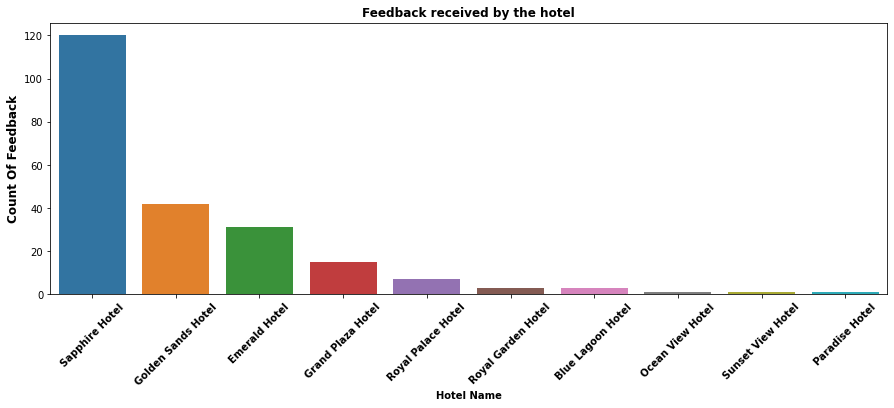

In [32]:
# Plot For Feedback received by the hotel

Hotel_Name = main_dataframe["meta_name"].value_counts()

plt.figure(figsize = (15,5))
sns.barplot(x=Hotel_Name.index , y=Hotel_Name.values)
plt.ylabel("Count Of Feedback",fontweight='bold',fontsize=12)
plt.xlabel("Hotel Name",fontweight='bold')
plt.title("Feedback received by the hotel",fontweight='bold',fontsize=12)

plt.xticks(rotation=45,fontweight='bold')

In [33]:
# The following is the price range for hotels
priceRangeWithHotel = main_dataframe.groupby("meta_name")["meta_priceRange"].unique().reset_index()

In [34]:

print("there are 10 different Hotels with price range Min to Max")
priceRangeWithHotel

there are 10 different Hotels with price range Min to Max


,meta_name,meta_priceRange
0,Blue Lagoon Hotel,[nan]
1,Emerald Hotel,[nan]
2,Golden Sands Hotel,[nan]
3,Grand Plaza Hotel,[nan]
4,Ocean View Hotel,[nan]
5,Paradise Hotel,[nan]
6,Royal Garden Hotel,[nan]
7,Royal Palace Hotel,[nan]
8,Sapphire Hotel,[nan]
9,Sunset View Hotel,[nan]


Now lets cheack missing values & duplicate values

In [35]:
df_nulls = pd.DataFrame(main_dataframe.isnull().sum().sort_values(ascending=False),columns= ["Number Of Missing Values"])
df_nulls["% of Missing Values"] = main_dataframe.isnull().sum().sort_values(ascending=False)/len(main_dataframe)
df_nulls

,Number Of Missing Values,% of Missing Values
subrating,224,1.000000
user,224,1.000000
meta_subrating,224,1.000000
meta_subrating.name,224,1.000000
meta_priceRange,224,1.000000
meta_value,224,1.000000
partner_attribution,223,0.995536
free_text,0,0.000000
feedback_title,0,0.000000
lang,0,0.000000


Text(0.5, 1.0, 'Visuliazation Matrix For Missing Values')

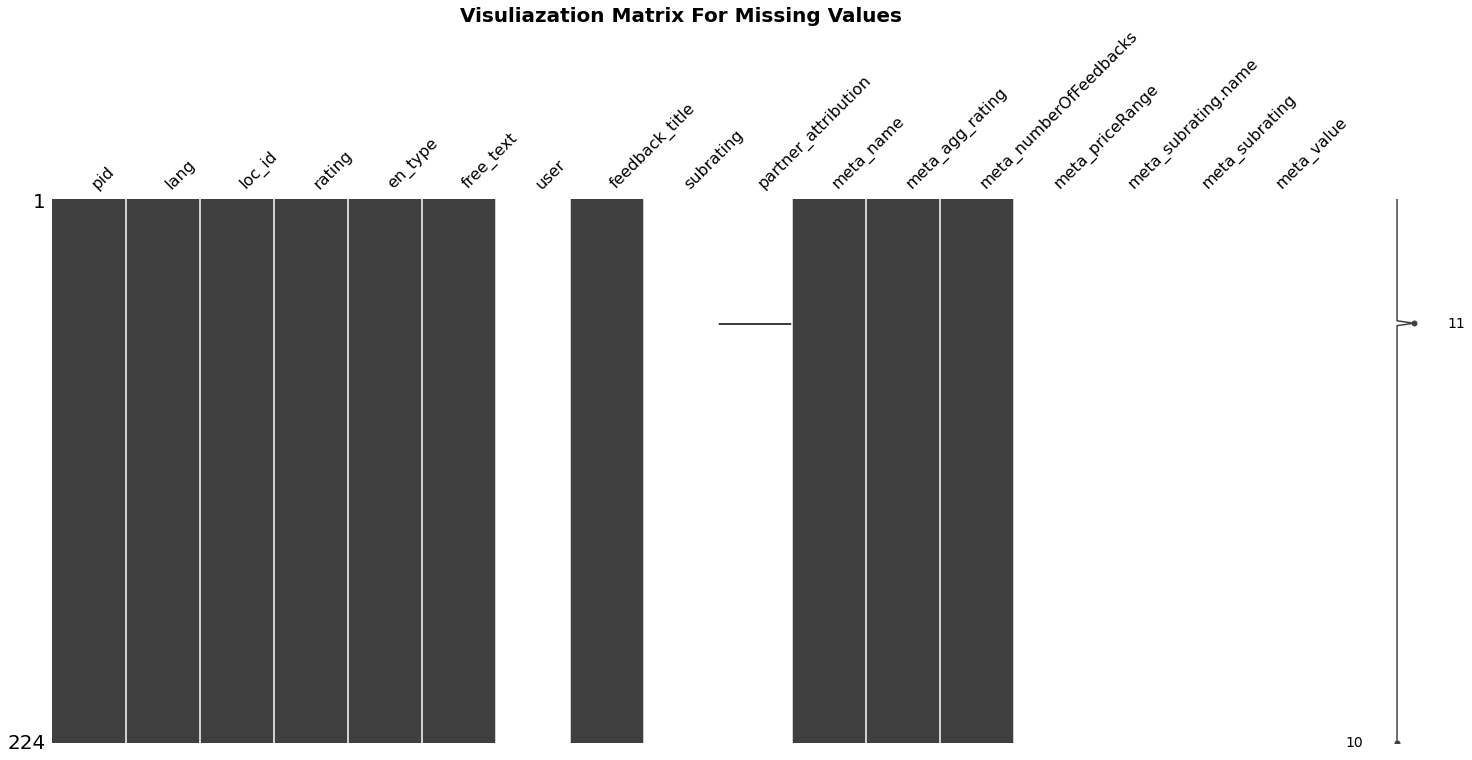

In [36]:
msno.matrix(main_dataframe,sparkline=True)

plt.title('Visuliazation Matrix For Missing Values', fontsize=20,fontweight='bold')

# 03.Text Preprocessing Using NLTK

-Dealing with Missing Values 

-Data Cleaning and text preprocessing 

-Analyazing Sentiment based on Rating & Reviews

-covert categorical to numeric features - Endcoding Features

-feature Scaling


Based Statstics of given Data I am doing sentiment analysis Using Reviews Features to undstand user sentiment or opinion toward Hotel So we required basically two features ‘Rating’ and ‘Review’
So I am extract some information from the text.

In [37]:
df_nulls

,Number Of Missing Values,% of Missing Values
subrating,224,1.000000
user,224,1.000000
meta_subrating,224,1.000000
meta_subrating.name,224,1.000000
meta_priceRange,224,1.000000
meta_value,224,1.000000
partner_attribution,223,0.995536
free_text,0,0.000000
feedback_title,0,0.000000
lang,0,0.000000


In [38]:
main_dataframe.columns

Index(['pid', 'lang', 'loc_id', 'rating', 'en_type', 'free_text', 'user',
       'feedback_title', 'subrating', 'partner_attribution', 'meta_name',
       'meta_agg_rating', 'meta_numberOfFeedbacks', 'meta_priceRange',
       'meta_subrating.name', 'meta_subrating', 'meta_value'],
      dtype='object')

In [39]:
# trim our dataset  for Model Building
main_dataframe = main_dataframe[['pid','meta_name','free_text','en_type','lang','rating','meta_agg_rating','feedback_title',]]

In [40]:
main_dataframe.head(n=5)

,pid,meta_name,free_text,en_type,lang,rating,meta_agg_rating,feedback_title
0,950009,Royal Palace Hotel,The room was clean and comfortable. I had a gr...,review,en,5,5.0,Good stay good value
1,175995,Royal Palace Hotel,The staff was friendly and helpful. They made ...,review,en,5,5.0,Excellent
2,922855,Royal Palace Hotel,The hotel had a great rooftop bar with stunnin...,review,en,5,5.0,Excellent
3,27080,Royal Palace Hotel,The breakfast buffet was delicious and had a g...,review,en,5,5.0,Excellent place to stay
4,905095,Royal Palace Hotel,The location of the hotel was perfect for a be...,review,en,4,5.0,Enjoyed the Stay


In [41]:
# Is this a null? No
main_dataframe.isnull().sum()

pid                0
meta_name          0
free_text          0
en_type            0
lang               0
rating             0
meta_agg_rating    0
feedback_title     0
dtype: int64

dataset there is rating from 1 to 5. So, According to Indian Hotel rating we will create there labels, Positive(for 4 & 5 Rating), Neutral(for 3 Rating) and Negative (for 1,& 2 Rating)

In [42]:
# define function 
def LabelFunc(rating):
    if rating >= 4:
        return "Postive"
    elif rating <= 2:
        return "Negative"
    else:
        return "Neautral"

In [43]:
main_dataframe["Label_Rating"] = main_dataframe["rating"].apply(LabelFunc)

In [44]:
main_dataframe["Label_Rating"].value_counts()

Postive     198
Negative     20
Neautral      6
Name: Label_Rating, dtype: int64

Text(0.5, 1.0, 'Sentiment Of User')

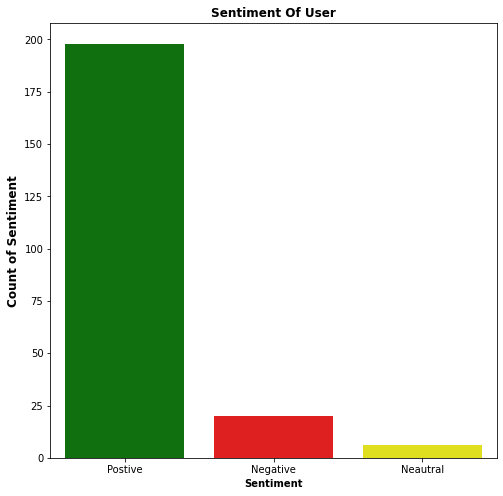

In [45]:
plt.figure(figsize=(8, 8))

color_palette = sns.color_palette(['green', 'Red',"yellow"])

sns.barplot(x=main_dataframe["Label_Rating"].value_counts().index ,
            y=main_dataframe["Label_Rating"].value_counts().values,palette=color_palette)

plt.ylabel("Count of Sentiment",fontweight='bold',fontsize=12)
plt.xlabel("Sentiment",fontweight='bold')
plt.title("Sentiment Of User",fontweight='bold',fontsize=12)

It can be seen that most of the guests rated the hotel services with 5 stars and 4 stars. So according to the above ratings, we can say that most of the guests are satisfied with the services of the hotel they stayed.

In [46]:
top5_high_feedback_hotels = main_dataframe["meta_name"].value_counts().head(5)
top5_high_feedback_hotels

Sapphire Hotel        120
Golden Sands Hotel     42
Emerald Hotel          31
Grand Plaza Hotel      15
Royal Palace Hotel      7
Name: meta_name, dtype: int64

Text(0.5, 1.0, 'Hotels received high feedback with user sentiment')

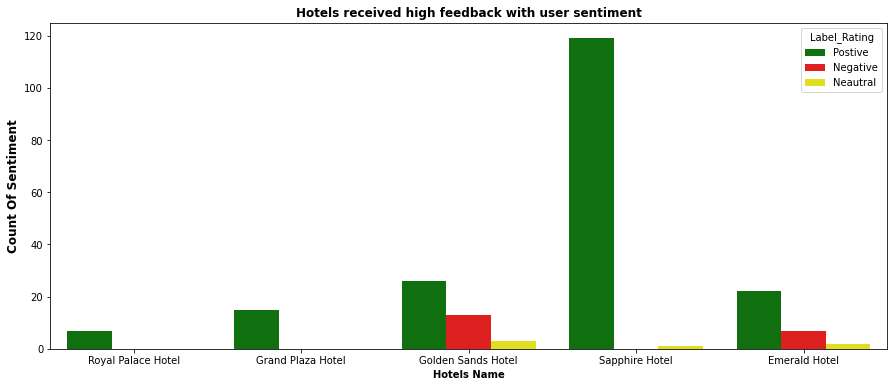

In [47]:
top5_high_hotels = main_dataframe[main_dataframe['meta_name'].isin(top5_high_feedback_hotels.index)]

# Plotting for top5_high_feedback_hotels with their  User Sentiment 
plt.figure(figsize=(15, 6))

custom_palette = {'Postive': 'green', 'Negative': 'red', 'Neautral': 'yellow'}

sns.countplot(x='meta_name', hue='Label_Rating', data=top5_high_hotels, palette=custom_palette)

plt.ylabel("Count Of Sentiment",fontweight='bold',fontsize=12)
plt.xlabel("Hotels Name",fontweight='bold')
plt.title("Hotels received high feedback with user sentiment",fontweight='bold',fontsize=12)

### Data Cleaning And Text Preprocessing ###

-Removing URL.

-Removing all irrelevant characters (Numbers and Punctuation).

-Convert all characters into lowercase.

-Tokenization

-Removing Stopwords

-Stemming and Lemmatization

-Remove the words having length <= 2

-Convert the list of tokens into back to the string

In [48]:
main_dataframe.head(2)

,pid,meta_name,free_text,en_type,lang,rating,meta_agg_rating,feedback_title,Label_Rating
0,950009,Royal Palace Hotel,The room was clean and comfortable. I had a gr...,review,en,5,5.0,Good stay good value,Postive
1,175995,Royal Palace Hotel,The staff was friendly and helpful. They made ...,review,en,5,5.0,Excellent,Postive


In [49]:
main_dataframe["lang"].value_counts()

en    222
fr      1
ru      1
Name: lang, dtype: int64

Text(0.5, 1.0, 'Language Types Of Reviews ')

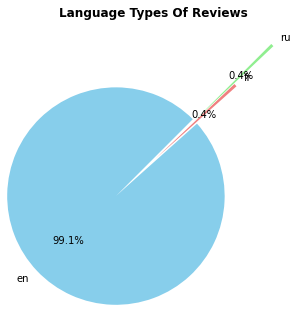

In [50]:
plt.figure(figsize=(5,5))

explode = (0.5, 0, 0.5)

plt.pie(main_dataframe["lang"].value_counts().values,
        labels=main_dataframe["lang"].value_counts().index,
        autopct='%1.1f%%',colors=['skyblue', 'lightcoral', 'lightgreen'],
        startangle=45, 
        explode=explode)

plt.title("Language Types Of Reviews ",fontweight='bold',fontsize=12)


In [51]:
main_dataframe["free_text"].iloc[1]

'The staff was friendly and helpful. They made sure I had everything I needed during my stay. The staff was friendly and helpful. They made sure I had everything I needed during my stay. The pool was clean and refreshing. I enjoyed spending time there during my stay. The Diamond Hotel was a great place to stay. The room was clean and comfortable. The staff was friendly and helpful. They made sure I had everything I needed during my stay.'

In [52]:
## see how it will change after each steps thats way i am pikup one review from the dataset & manipulate 

main_dataframe.loc[1,"free_text"] = '###The staff was friendly and helpful### 100%. They made sure I had everything I needed during my stay. The staff was friendly😇 and helpful. They made sure I had everything I needed during my stay. The pool was clean and refreshing🤝. I enjoyed spending time there during my stay. The Diamond Hotel was a great place to stay. The room was clean and comfortable. The staff was friendly and helpful. They made sure I had everything I needed during my stay.♥️♥️♥️https://www.tajhotels.com/en-in/destination/hotels-in-mumbai/?gclid=CjwKCAjw4P6oBhBsEiwAKYVkq97BCfl3AU9gV2CAKvS6vX7jz_AHbvdOXijtzUcWpbuhs9IRYvyMwBoCTFwQAvD_BwE&gclsrc=aw.ds'

In [53]:
main_dataframe["free_text"].iloc[1]

'###The staff was friendly and helpful### 100%. They made sure I had everything I needed during my stay. The staff was friendly😇 and helpful. They made sure I had everything I needed during my stay. The pool was clean and refreshing🤝. I enjoyed spending time there during my stay. The Diamond Hotel was a great place to stay. The room was clean and comfortable. The staff was friendly and helpful. They made sure I had everything I needed during my stay.♥️♥️♥️https://www.tajhotels.com/en-in/destination/hotels-in-mumbai/?gclid=CjwKCAjw4P6oBhBsEiwAKYVkq97BCfl3AU9gV2CAKvS6vX7jz_AHbvdOXijtzUcWpbuhs9IRYvyMwBoCTFwQAvD_BwE&gclsrc=aw.ds'

Removing url

In [54]:
# to remove non url , numbers and special character

def Clean_url(review_text):
    return re.sub(r'http\S+', "",review_text) 



In [55]:
main_dataframe["Clean_free_text"] =  main_dataframe["free_text"].apply(Clean_url)

In [56]:
# look record how it will change

main_dataframe["Clean_free_text"].iloc[1]

'###The staff was friendly and helpful### 100%. They made sure I had everything I needed during my stay. The staff was friendly😇 and helpful. They made sure I had everything I needed during my stay. The pool was clean and refreshing🤝. I enjoyed spending time there during my stay. The Diamond Hotel was a great place to stay. The room was clean and comfortable. The staff was friendly and helpful. They made sure I had everything I needed during my stay.♥️♥️♥️'

Removing non alphabetical Chararcter

In [57]:
# Removing non alphabetical Chararcter like special symbol & Numbers

def Clean_non_Alph(review_text):
    return re.sub('[^a-zA-Z]', ' ',review_text) 

main_dataframe["Clean_free_text"] = main_dataframe["Clean_free_text"].apply(Clean_non_Alph)

In [58]:
# look record

main_dataframe["Clean_free_text"].iloc[1]

'   The staff was friendly and helpful          They made sure I had everything I needed during my stay  The staff was friendly  and helpful  They made sure I had everything I needed during my stay  The pool was clean and refreshing   I enjoyed spending time there during my stay  The Diamond Hotel was a great place to stay  The room was clean and comfortable  The staff was friendly and helpful  They made sure I had everything I needed during my stay       '

Convert all text into lowecsing 

In [59]:
# Convert all text into lowecsing 

def Clean_lowercase(review_text):
    return str(review_text).lower()

main_dataframe["Clean_free_text"] = main_dataframe["Clean_free_text"].apply(Clean_lowercase)


In [60]:
# look record

main_dataframe["Clean_free_text"].iloc[1]

'   the staff was friendly and helpful          they made sure i had everything i needed during my stay  the staff was friendly  and helpful  they made sure i had everything i needed during my stay  the pool was clean and refreshing   i enjoyed spending time there during my stay  the diamond hotel was a great place to stay  the room was clean and comfortable  the staff was friendly and helpful  they made sure i had everything i needed during my stay       '

Tokenization

In [61]:
# Tokenization using NLTK Library (split text into small peace)

def Clean_Tokenization(review_text):
    return word_tokenize(review_text)

main_dataframe["Clean_free_text"] = main_dataframe["Clean_free_text"].apply(Clean_Tokenization)


In [62]:
# look record

print(main_dataframe["Clean_free_text"].iloc[1],end="")

['the', 'staff', 'was', 'friendly', 'and', 'helpful', 'they', 'made', 'sure', 'i', 'had', 'everything', 'i', 'needed', 'during', 'my', 'stay', 'the', 'staff', 'was', 'friendly', 'and', 'helpful', 'they', 'made', 'sure', 'i', 'had', 'everything', 'i', 'needed', 'during', 'my', 'stay', 'the', 'pool', 'was', 'clean', 'and', 'refreshing', 'i', 'enjoyed', 'spending', 'time', 'there', 'during', 'my', 'stay', 'the', 'diamond', 'hotel', 'was', 'a', 'great', 'place', 'to', 'stay', 'the', 'room', 'was', 'clean', 'and', 'comfortable', 'the', 'staff', 'was', 'friendly', 'and', 'helpful', 'they', 'made', 'sure', 'i', 'had', 'everything', 'i', 'needed', 'during', 'my', 'stay']

In [63]:
# After data cleaning & get list of string of each record 
main_dataframe[["free_text","Clean_free_text"]].iloc()

Removing Stopword 

In [64]:
## Removing Stopword 

# print All Stopword dict in NLTK library
print(stopwords.words("english"),end="")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [65]:
stop_words = set(stopwords.words("english"))

def Clean_Stopwords(token):
    return [ item for item in token if item not in stop_words]

main_dataframe["Clean_free_text"] = main_dataframe["Clean_free_text"].apply(Clean_Stopwords)

In [66]:
# look record

print(main_dataframe["Clean_free_text"].iloc[1],end="")

['staff', 'friendly', 'helpful', 'made', 'sure', 'everything', 'needed', 'stay', 'staff', 'friendly', 'helpful', 'made', 'sure', 'everything', 'needed', 'stay', 'pool', 'clean', 'refreshing', 'enjoyed', 'spending', 'time', 'stay', 'diamond', 'hotel', 'great', 'place', 'stay', 'room', 'clean', 'comfortable', 'staff', 'friendly', 'helpful', 'made', 'sure', 'everything', 'needed', 'stay']

Lemmatization

In [67]:
## Lemmatization (eg .'refreshing' > "refresh"  or 'spending' > "spend") text convert into root base text 

lemma = WordNetLemmatizer()

def Clean_Lemmatization(token):
    return [lemma.lemmatize(word=w,pos="v") for w in token]

main_dataframe["Clean_free_text"] = main_dataframe["Clean_free_text"].apply(Clean_Lemmatization)


In [68]:
# look record

print(main_dataframe["Clean_free_text"].iloc[1],end="")

['staff', 'friendly', 'helpful', 'make', 'sure', 'everything', 'need', 'stay', 'staff', 'friendly', 'helpful', 'make', 'sure', 'everything', 'need', 'stay', 'pool', 'clean', 'refresh', 'enjoy', 'spend', 'time', 'stay', 'diamond', 'hotel', 'great', 'place', 'stay', 'room', 'clean', 'comfortable', 'staff', 'friendly', 'helpful', 'make', 'sure', 'everything', 'need', 'stay']

Remove the words having length <= 2 

In [69]:
def Clean_wordLength(token):
    return [i for i in token if len(i) > 2]

main_dataframe["Clean_free_text"] = main_dataframe["Clean_free_text"].apply(Clean_wordLength)

In [70]:
# look record

print(main_dataframe["Clean_free_text"].iloc[1],end="")

['staff', 'friendly', 'helpful', 'make', 'sure', 'everything', 'need', 'stay', 'staff', 'friendly', 'helpful', 'make', 'sure', 'everything', 'need', 'stay', 'pool', 'clean', 'refresh', 'enjoy', 'spend', 'time', 'stay', 'diamond', 'hotel', 'great', 'place', 'stay', 'room', 'clean', 'comfortable', 'staff', 'friendly', 'helpful', 'make', 'sure', 'everything', 'need', 'stay']

### Text Visualization ###

After text preprocessing, let’s look at our corpus and observe is this ready for model building or not?

In [71]:
main_dataframe["Label_Rating"].value_counts()

Postive     198
Negative     20
Neautral      6
Name: Label_Rating, dtype: int64

In [72]:
# split our dataset corresponding to labels ,Positive , Negative & Neaural

Positive_Reviews = main_dataframe[main_dataframe["Label_Rating"] =="Postive"]["Clean_free_text"]
Negative_Reviews = main_dataframe[main_dataframe["Label_Rating"] =="Negative"]["Clean_free_text"]
Neutral_Reviews = main_dataframe[main_dataframe["Label_Rating"] =="Neautral"]["Clean_free_text"]

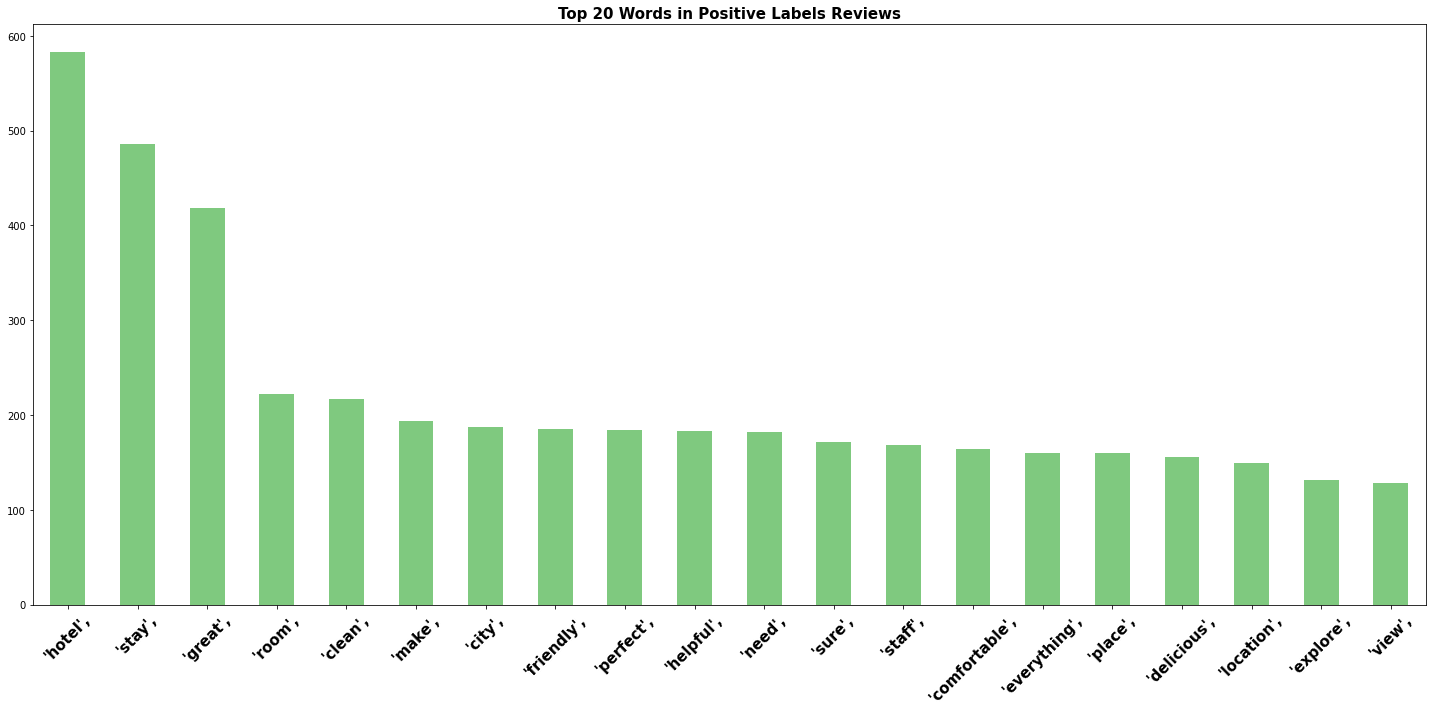

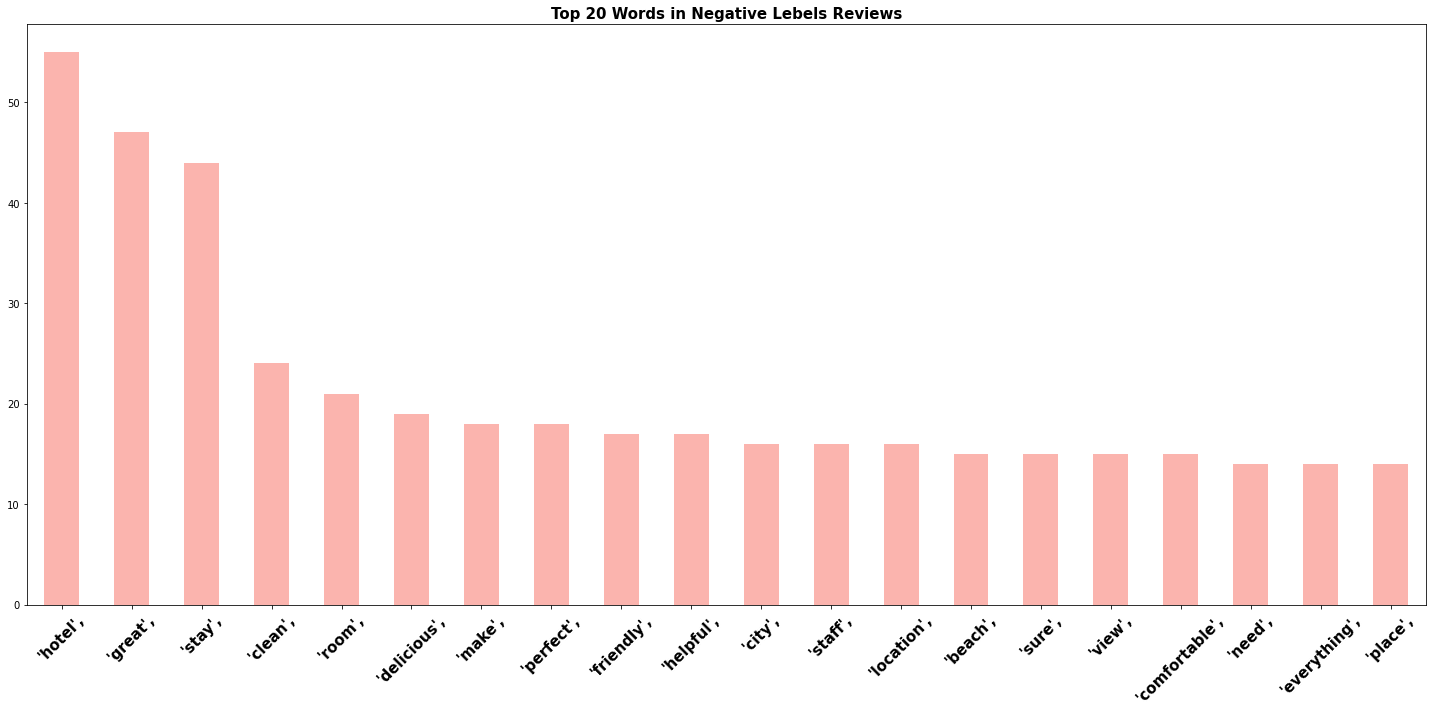

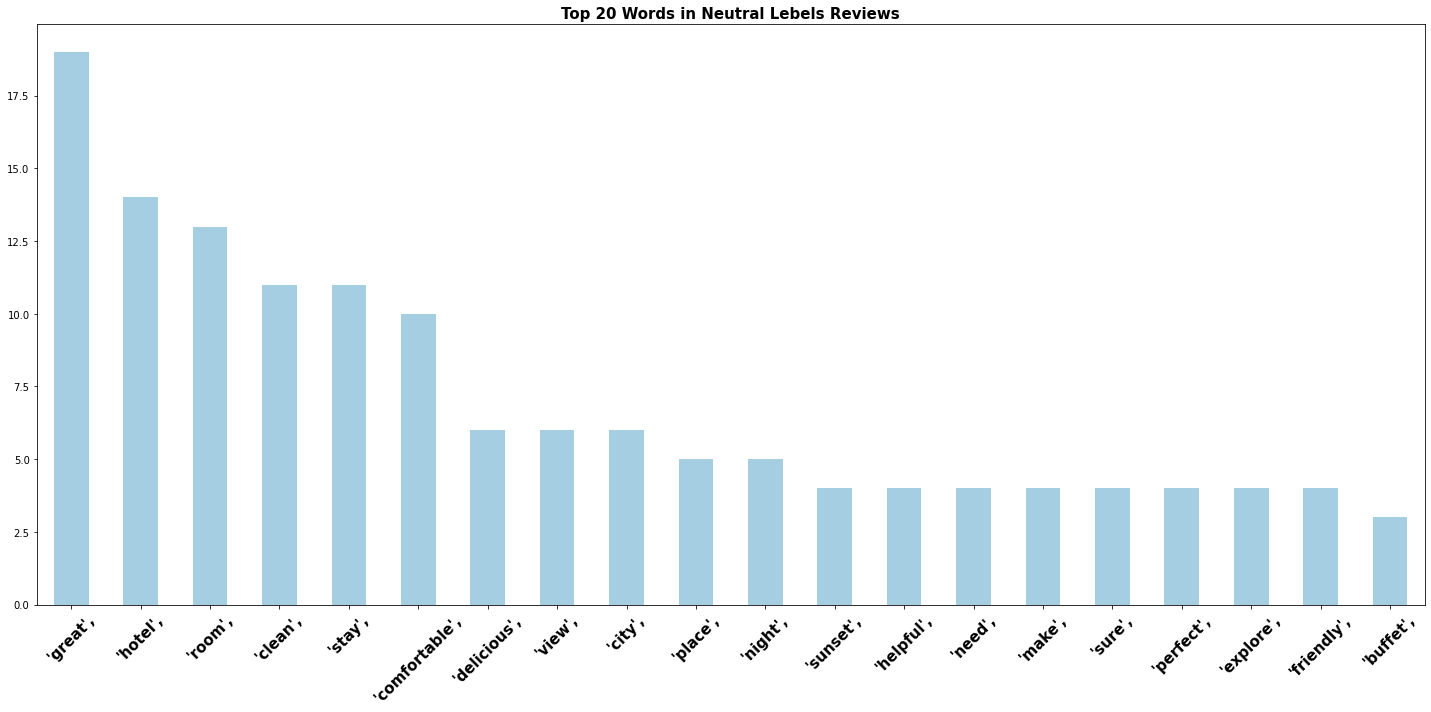

In [73]:
# Plot our corpus frequency in our corpus with Corresponding to labels so i am taking top 20 words 

color = ["Accent", "Pastel1" ,"Paired"]
Filterd_data = [Positive_Reviews, Negative_Reviews, Neutral_Reviews]
title_name = ["Positive Labels","Negative Lebels","Neutral Lebels"]

for item in range(3):
    plt.figure(figsize=(20, 10))
    # Convert each item in the list to a string using map
    text_data = ' '.join(map(str, Filterd_data[item]))
    pd.Series(text_data.split()).value_counts().head(20).plot(kind="bar", colormap=color[item])
    
    plt.title(f"Top 20 Words in {title_name[item]} Reviews",fontweight='bold',fontsize=15)
    plt.xticks(rotation=45 ,fontweight='bold',fontsize=15)
    plt.tight_layout()

plt.show()

Observation: Here we can clearly observe that there is a word ‘Hotel’,"great", which is common in all the labels and having highest frequency. So, it will be a good step if we remove the this  word from our corpus for a better performance. 

So we can not decided using this words to understand of customer sentiment

In [79]:
## Removing this worlds from our corpus 
def Word_Remove(review):
    if isinstance(review, str):
        return ' '.join([i for i in review.split() if i != "hotel" and i != "great"])
    elif isinstance(review, list):
        return ' '.join([i for i in review if i != "hotel" and i != "great"])
    else:
        return review

# Assuming Positive_Reviews, Negative_Reviews, and Neutral_Reviews are Pandas Series
Positive_Reviews = Positive_Reviews.apply(Word_Remove)
Negative_Reviews = Negative_Reviews.apply(Word_Remove)
Neutral_Reviews = Neutral_Reviews.apply(Word_Remove)
main_dataframe["Clean_free_text"] = main_dataframe["Clean_free_text"].apply(Word_Remove)



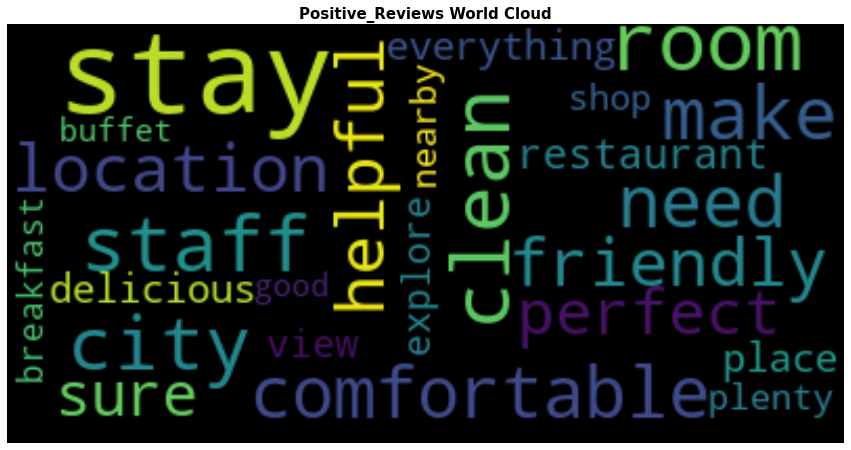

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Creating word cloud
wc = WordCloud(collocations=False, max_font_size=55, max_words=25, background_color="black")
wc.generate(' '.join(Positive_Reviews))

plt.figure(figsize=(15, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Positive_Reviews World Cloud",fontweight='bold',fontsize=15)
plt.show()

Oberve that above world Cloud in the context of Positive_Reviews, are talking about Clean, Helpul,friendly and Perfect — which is sort of true!

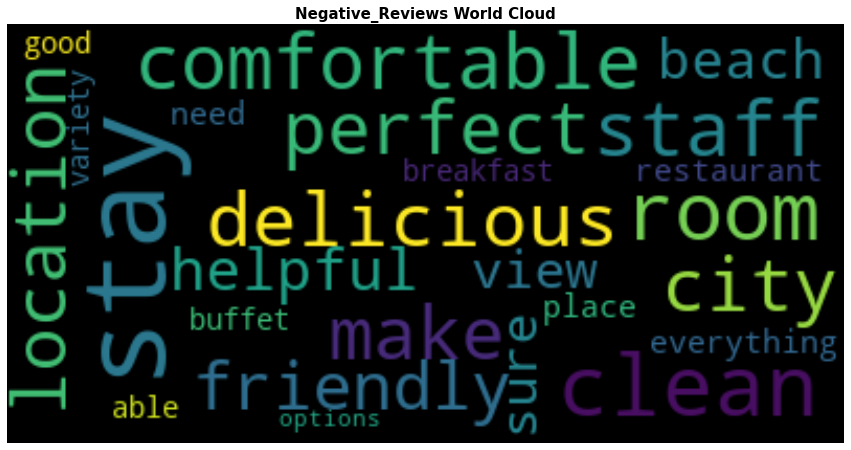

In [83]:
# Creating word cloud
wc = WordCloud(collocations=False, max_font_size=55, max_words=25, background_color="black")
wc.generate(' '.join(Negative_Reviews))

plt.figure(figsize=(15, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Negative_Reviews World Cloud",fontweight='bold',fontsize=15)
plt.show()

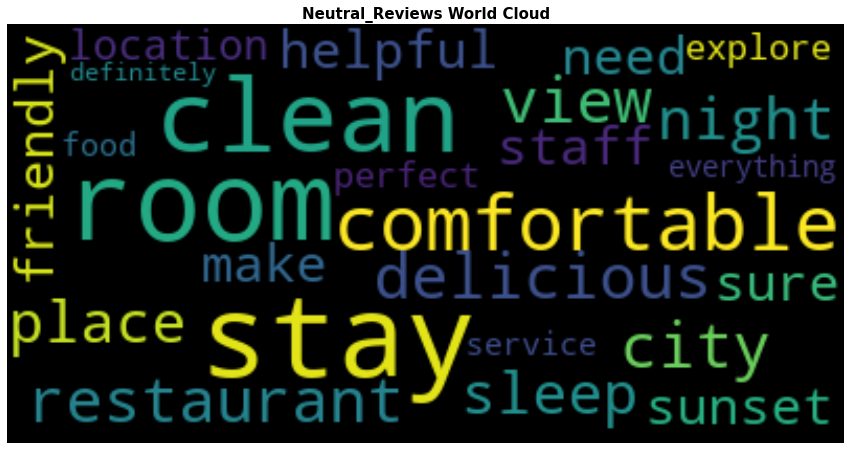

In [84]:
# Creating word cloud
wc = WordCloud(collocations=False, max_font_size=55, max_words=25, background_color="black")
wc.generate(' '.join(Neutral_Reviews))

plt.figure(figsize=(15, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral_Reviews World Cloud",fontweight='bold',fontsize=15)
plt.show()